# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
#Unity Machine Learning Agents allows researchers and developers to transform games and simulations created 
#using the Unity Editor into environments where intelligent agents can be trained using reinforcement learning, 
#evolutionary strategies, or other machine learning methods through a simple to use Python API.

import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
import os
%matplotlib inline

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux_NoVis/Reacher_Linux_NoVis/Reacher.x86_64')#"headless" version of the environment. 

#env = UnityEnvironment(file_name='Reacher_Linux/Reacher_Linux/Reacher.x86_64')#enable virtual screen
#https://github.com/Unity-Technologies/ml-agents/blob/main/docs/Training-on-Amazon-Web-Service.md

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print (brain)

Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
'''
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
'''

"\nenv_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \nstates = env_info.vector_observations                  # get the current state (for each agent)\nscores = np.zeros(num_agents)                          # initialize the score (for each agent)\nwhile True:\n    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n    env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n    next_states = env_info.vector_observations         # get next state (for each agent)\n    rewards = env_info.rewards                         # get reward (for each agent)\n    dones = env_info.local_done                        # see if episode finished\n    scores += env_info.rewards                         # update the score (for each agent)\n    states = next_states                               # roll over states to next ti

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
env_info = env.reset(train_mode=True)[brain_name]

agent = Agent(state_size=state_size,
              action_size=action_size,
              random_seed=10)

In [8]:
# select an action (for each agent)
actions = np.random.randn(num_agents, action_size) 
actions = np.clip(actions, -1, 1)
print (actions.shape)

(1, 4)


In [9]:
#explore attributes of BrianInfo
step_info = env.step(actions)[brain_name]

states = step_info.vector_observations
memories = step_info.memories
rewards = step_info.rewards
dones = step_info.local_done
actions = step_info.previous_vector_actions
agents = step_info.agents
print (states,memories,rewards,dones,actions)
print (agents)


[[-1.01524353e-01 -3.99566483e+00 -1.76119626e-01  9.99680221e-01
  -1.26252249e-02 -2.33226398e-04 -2.19103452e-02  8.70086551e-01
   1.32839866e-02 -5.01739323e-01 -2.01769853e+00  1.23310365e-01
  -3.49570823e+00 -6.92691803e-02 -9.98338890e+00 -6.45728111e-02
   9.99015629e-01  1.79562047e-02 -1.93693442e-03  4.05186079e-02
  -1.61118007e+00  1.10591665e-01  7.10067630e-01 -3.39309633e-01
   6.35136187e-01  1.05505049e+00 -6.11648560e+00 -1.00000000e+00
  -5.15641546e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  -5.33014059e-01]] [] [0.0] [False] [[ 0.77077764 -1.         -0.92571908  0.11067145]]
[922]


Episode 1	Average Score: 1.22
Episode 2	Average Score: 0.59
Episode 3	Average Score: 0.35
Episode 4	Average Score: 1.33
Episode 5	Average Score: 0.90
Episode 6	Average Score: 0.54
Episode 7	Average Score: 0.53
Episode 8	Average Score: 0.43
Episode 9	Average Score: 0.15
Episode 10	Average Score: 1.30
Episode 11	Average Score: 0.19
Episode 12	Average Score: 0.28
Episode 13	Average Score: 0.00
Episode 14	Average Score: 0.30
Episode 15	Average Score: 0.27
Episode 16	Average Score: 0.47
Episode 17	Average Score: 1.44
Episode 18	Average Score: 0.87
Episode 19	Average Score: 0.15
Episode 20	Average Score: 0.00
Episode 20	Average Score of deque: 0.57
Episode 21	Average Score: 0.38
Episode 22	Average Score: 0.82
Episode 23	Average Score: 0.99
Episode 24	Average Score: 0.64
Episode 25	Average Score: 0.00
Episode 26	Average Score: 0.11
Episode 27	Average Score: 0.23
Episode 28	Average Score: 0.28
Episode 29	Average Score: 0.00
Episode 30	Average Score: 0.39
Episode 31	Average Score: 0.00
Episode 

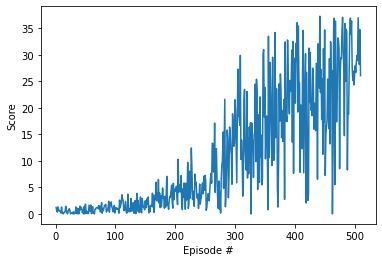

In [10]:
import time

def ddpg(n_episodes=1000, max_t=1000, print_every=20):
    scores_deque = deque(maxlen=print_every)
    scores = []
    eps = EPS_START
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations #2D
        #print (state.shape)
        agent.reset()
        agents_scores = np.zeros(num_agents)
        for t in range(max_t):
            action = agent.act(state)
            step_info= env.step(action)[brain_name]
            next_state = step_info.vector_observations#2D
            reward = step_info.rewards#1D
            done = step_info.local_done#1D
            agent.step(state, action, reward, next_state, done)
        
            state = next_state
            agents_scores += reward
            
            
            if any(done):
                #print ("\t score:",agents_scores)
                break 
        ep_avg_agents_score = np.mean(agents_scores)
        scores_deque.append(ep_avg_agents_score)
        scores.append(ep_avg_agents_score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, ep_avg_agents_score, end=""))
       
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score of deque: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        
        mean = np.mean(scores_deque)
        if mean > 30.:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score of deque: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'solved_actor_trained_model.pth')
            torch.save(agent.critic_local.state_dict(), 'solved_critic_trained_model.pth')
            break
            
    return scores
start=time.time()
scores = ddpg()
print ("duration:",(time.time()-start)/60)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()